## Linear Classifier
**Ключевой идеей** линейной классификации, заключается в том, что целевые классы, могут быть разделеные гиперплоскость в признаковом пространстве. Если это можно сделать без ошибки, то обучающая выборка называется *линейно разделимой*.

Рассмотрим задачу **бинарной классификации**, причем метки целевого класса обозначим "+1" и "-1". Один из простых классификаторов получается на основе регрессии: $\large a(\vec x) = \text{sign}(\vec w^T x)$,

где
- $\vec{x}$ – вектор признаков примера (вместе с единицей);
- $\vec{w}$ – веса в линейной модели (вместе со смещением $w_0$);
- $sign(\bullet)$ – функция "сигнум", возвращающая знак своего аргумента;
- $a(\vec{x})$ – ответ классификатора на примере $\vec{x}$.

### Logistic Regression as a Linear Classifier

Логистическая регрессия является частным случаем линейного классификатора, обладая хорошим умением предсказывать **вероятность** отнесения примера к положительному классу.
$$p_+ = P(y_i=1 |\vec{x_i},\vec w)$$
Прогнозирование вероятности ответа является важным бизнес требованием во многих задачах. Напимер при кредитном скоринге, мы прогнозируем вероятность $p_+$, того что клиент не вернет займ.

Мы хотим прогнозировать вероятность $p_+ \in [0,1]$, а пока умеем строить линейный прогноз с помощью МНК: $b(\vec{x}) = \vec{w}^T \vec{x} \in R$. Нужно отразить полученное значение на интервал $[0,1]$. В лог регерессии для этого используется функция: $$f: \mathbb{R} \rightarrow [0,1] : \sigma(z) = \frac{1}{1 + \exp^{-z}}$$

$OR(X)$ определяется из $\large \frac{P(X)}{1-P(X)}$, а это — отношение вероятностей того, произойдет ли событие или не произойдет. $OR(x) \in [0, +\infty] => logOR(x) \in R$. Его и будем исспользовать для метода наименьших квадратов (OLS).

Рассмотрим, как логистическая регрессия будет делать прогноз $p_+ = P\left(y_i = 1 \mid \vec{x_i}, \vec{w}\right)$
1. Вычислить значение $w_{0}+w_{1}x_1 + w_{2}x_2 + ... = \vec{w}^T\vec{x}$. (уравнение $\vec{w}^T\vec{x} = 0$ задает гиперплоскость, разделяющую примеры на 2 класса)
2. Вычислить логарифм отношения шансов: $ \log(OR_{+}) = \vec{w}^T\vec{x}$.
3. Имея прогноз шансов на отнесение к классу "+" – $OR_{+}$, вычислить $p_{+}$ с помощью простой зависимости: $\large p_{+} = \frac{OR_{+}}{1 + OR_{+}} = \frac{\exp^{\vec{w}^T\vec{x}}}{1 + \exp^{\vec{w}^T\vec{x}}} = \frac{1}{1 + \exp^{-\vec{w}^T\vec{x}}} = \sigma(\vec{w}^T\vec{x})$

Итак: $$\large p_+(x_i) = P\left(y_i = 1 \mid \vec{x_i}, \vec{w}\right) = \sigma(\vec{w}^T\vec{x_i}).$$

### Maximum Likelihood Estimation and Logistic Regression

Итак: $\large P\left(y = y_i \mid \vec{x_i}, \vec{w}\right) = \sigma(y_i\vec{w}^T\vec{x_i})$

Выражение $M(\vec{x_i}) = y_i\vec{w}^T\vec{x_i}$ называется *отступом*(margin) классификации на объекте $\vec x_i$. Если он неотрицателен, модель не ошибается на объекте $\vec{x_i}$, если же отрицателен – значит, класс для $\vec{x_i}$ спрогнозирован неправильно. Отступ определен только для объектов обучающей выборки.

$\large \rho(\vec{x_A}, \vec{w}^T\vec{x} = 0) = \frac{\vec{w}^T\vec{x_A}}{||\vec{w}||} \implies M(\vec x_i)$ - своего рода "уверенность" модели в классификации объекта $x_i$.

- если отступ большой (по модулю) и положительный, это значит, что метка класса поставлена правильно, а объект находится далеко от разделяющей гиперплоскости.
- если отступ большой (по модулю) и отрицательный, значит метка класса поставлена неправильно, а объект находится далеко от разделяющей гиперплоскости (скорее всего такой объект – аномалия, например, его метка в обучающей выборке поставлена неправильно)
- если отступ малый (по модулю), то объект находится близко к разделяющей гиперплоскости, а знак отступа определяет, правильно ли объект классифицирован. На рисунке

<img src="https://habrastorage.org/r/w1560/files/397/85b/265/39785b2651514289b424a1dacdffd2ba.png" width="400px">

Теперь распишем правдоподобие выборки: вероятность наблюдать $\vec y$ у выборки $X$.
$$\large P\left(\vec{y} \mid X, \vec{w}\right) = \prod_{i=1}^{\ell} P\left(y = y_i \mid \vec{x_i}, \vec{w}\right),$$
где $\ell$ длина выборки $X$ (число строк)

$\large \begin{array}{rcl} \log P\left(\vec{y} \mid X, \vec{w}\right) &=& \log \prod_{i=1}^{\ell} P\left(y = y_i \mid \vec{x_i}, \vec{w}\right) \\ &=& \log \prod_{i=1}^{\ell} \sigma(y_i\vec{w}^T\vec{x_i}) \\ &=& \sum_{i=1}^{\ell} \log \sigma(y_i\vec{w}^T\vec{x_i}) \\ &=& \sum_{i=1}^{\ell} \log \frac{1}{1 + \exp^{-y_i\vec{w}^T\vec{x_i}}} \\ &=& - \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\vec{w}^T\vec{x_i}}) \end{array}$

То есть в даном случае принцип максимизации правдоподобия приводит к минимизации выражения

$\large \mathcal{L_{log}} (X, \vec{y}, \vec{w}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\vec{w}^T\vec{x_i}})$

Это **логистическая функция потерь**, просуммированная по всем объектам обучающей выборки.


### $L_2$-регуляризация логистических потерь
L2-регуляризация логистической регрессии устроена почти так же, как и в случае с гребневой (Ridge регрессией).
Вместо функционала $\mathcal{L_{log}} (X, \vec{y}, \vec{w})$ минимизируется следующий: $$\large J(X, \vec{y}, \vec{w}) = \mathcal{L_{log}} (X, \vec{y}, \vec{w}) + \lambda |\vec{w}|^2$$

В случае логистической регрессии принято введение обратного коэффициента регуляризации $C = \frac{1}{\lambda}$.

$\large \hat{w} = \arg \min_{\vec{w}} J(X, \vec{y}, \vec{w}) = \arg \min_{\vec{w}}\ (C\sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\vec{w}^T\vec{x_i}})+ |\vec{w}|^2)$

## An Illustrative Example of Logistic Regression Regularization
Посмотрим как регулизация влияет на качетво классификации, на примере датасета микрочипов. Мы будем использовать логистическую регрессию с полиномиальными признаками и изменять параметр регуляризации.
Cначала рассмотрим, как регулизация влияет на разделяющую границу классификатора, разберем недообучение и переобучение. Потом проведем кросс валидацию и подберем гиперпараметры.


In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
#sharper plots
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [6]:
data = pd.read_csv(
    "microchip_tests.txt",
    header=None,
    names=("test1", "test2", "released")
)
data


,test1,test2,released
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


In [10]:
X = data.iloc[:, :2].values
y = data.iloc[:, 2].values

Визуализируем данные, синий - сиправные графики, оранжевый - нет

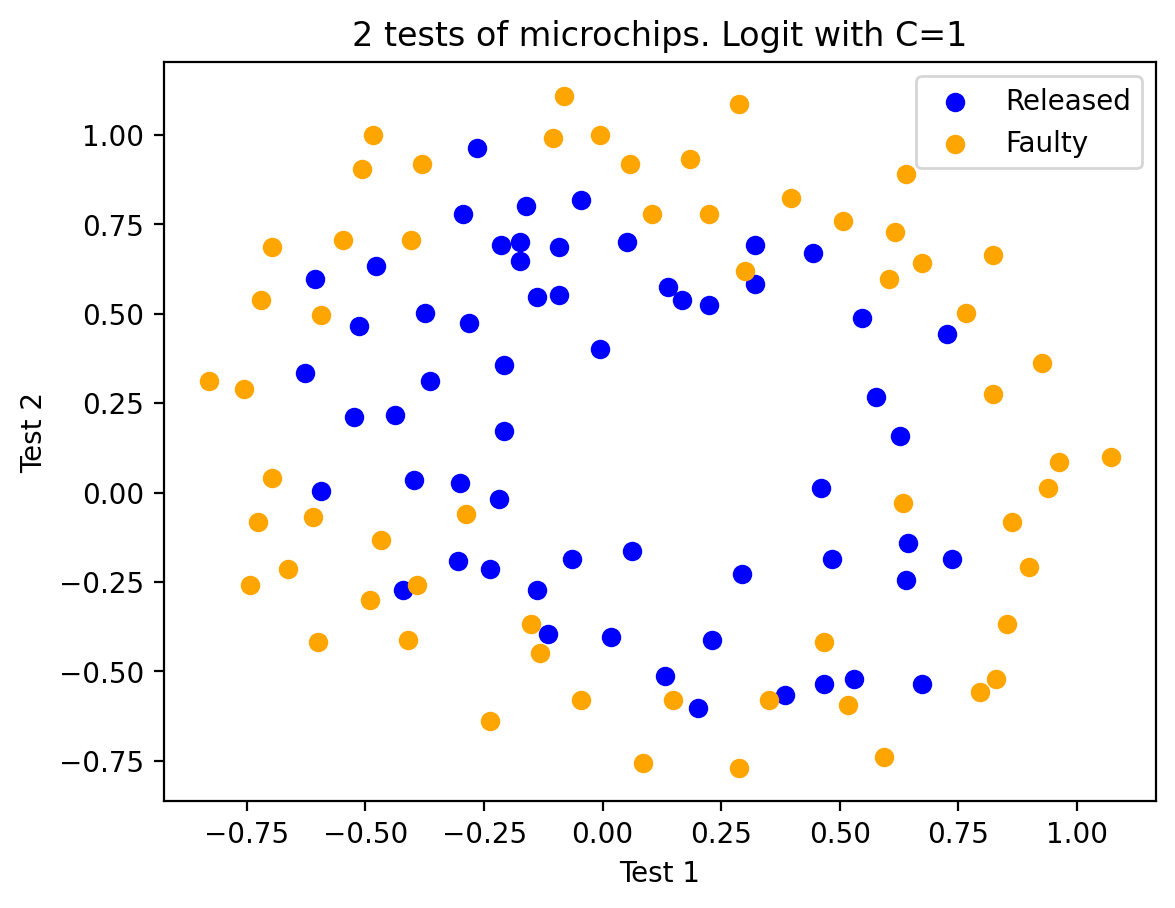

In [13]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label="Released")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label="Faulty")
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("2 tests of microchips. Logit with C=1")
plt.legend()

In [14]:
def plot_boundary(clf, X, y, grid_step=0.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, grid_step), np.arange(y_min, y_max, grid_step)
    )

    # to every point from [x_min, m_max]x[y_min, y_max]
    # we put in correspondence its own color
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

Полиномиальными признаками до степени $d$ для двух переменных $x_1$ и $x_2$ мы называем следующие:
$\large \{x_1^d, x_1^{d-1}x_2, \ldots x_2^d\} = \{x_1^ix_2^j\}_{i+j \leq d, i,j \in \mathbb{N}}$

Например, для $d=3$ это будут следующие признаки:
$\large 1, x_1, x_2, x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3$

Будем использовать `sklearn`'s применение логистической регресии. Создадим объект который добавит полиномиальные фичи 7 степени.

In [19]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)
X_poly.shape

(118, 36)

Accuracy on training set: 0.627


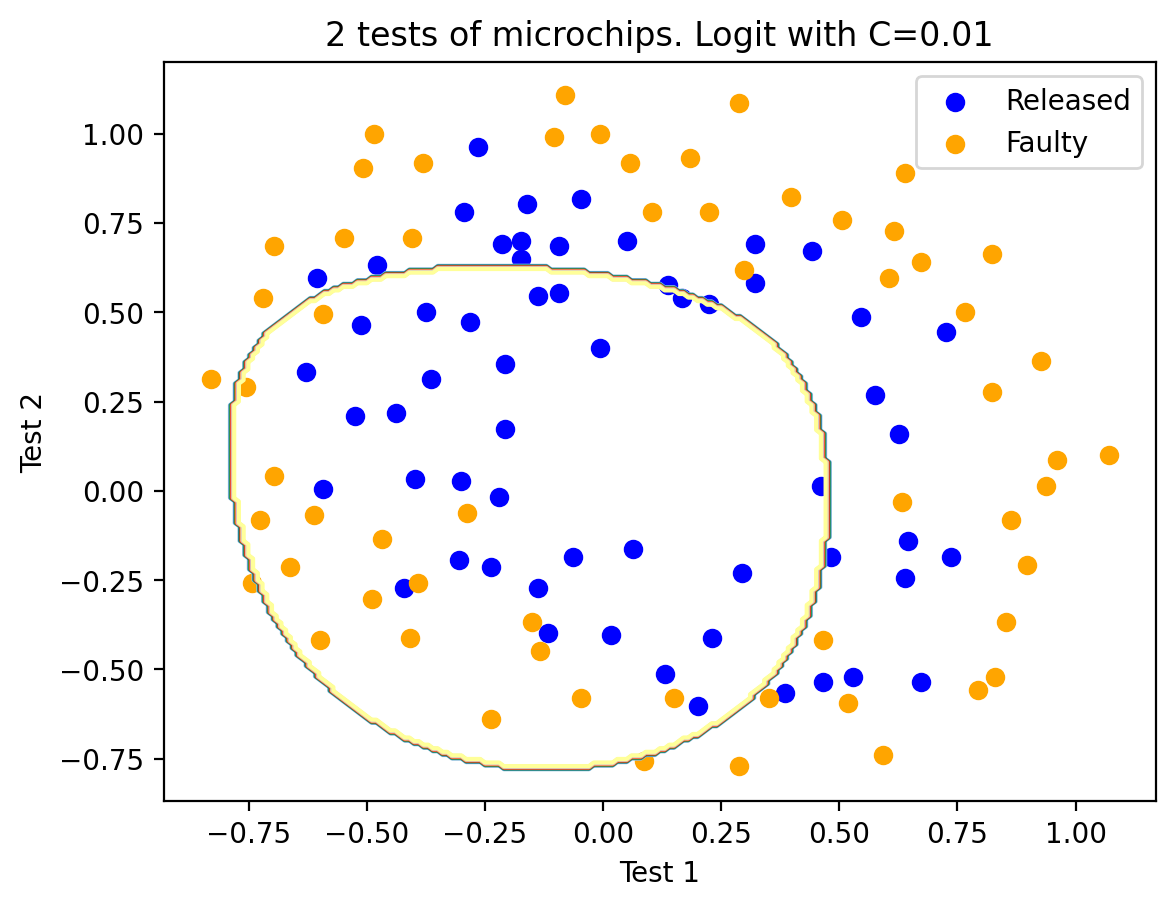

In [23]:
C = 1e-2
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=0.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Released")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="orange", label="Faulty")
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("2 tests of microchips. Logit with C=%s" % C)
plt.legend()

print("Accuracy on training set:", round(logit.score(X_poly, y), 3))

Повторим, но увеличим С до 1

Accuracy on training set: 0.831


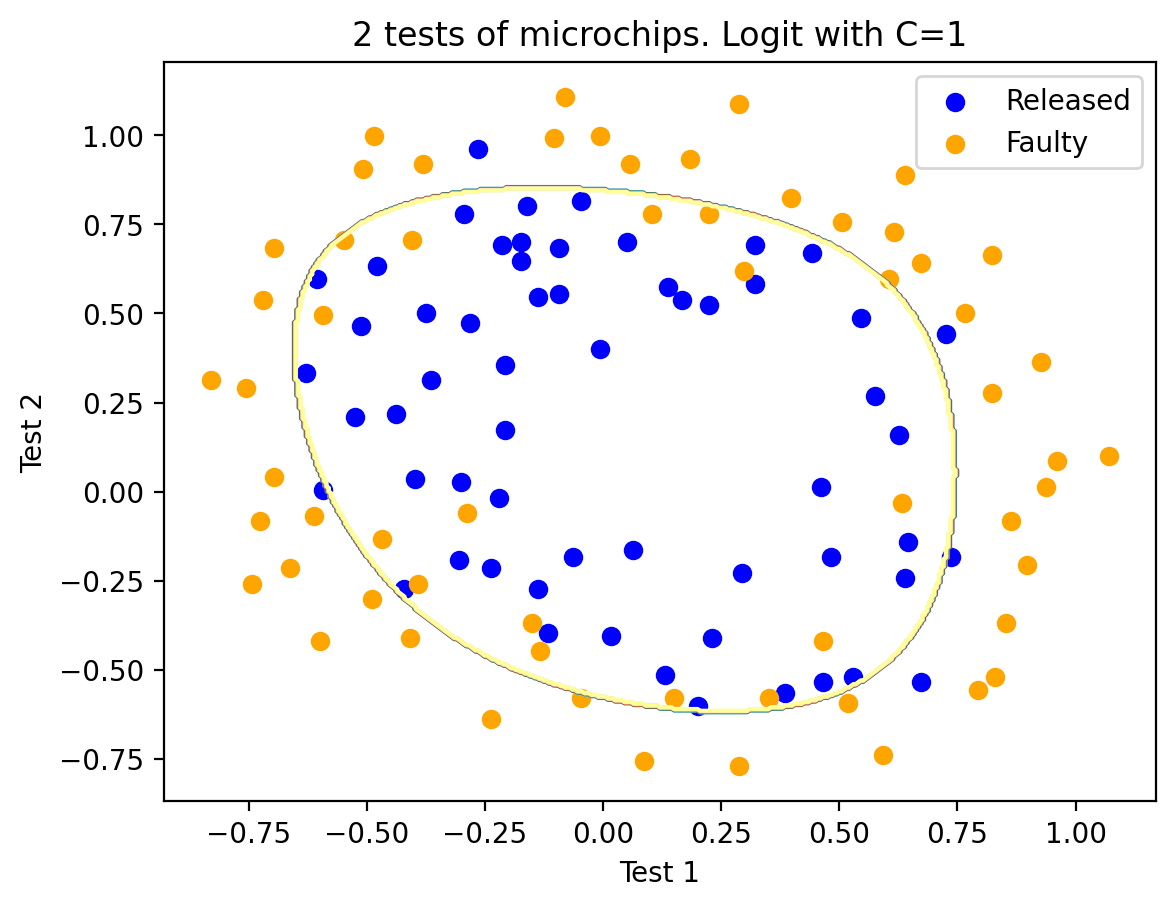

In [ ]:
C = 1
logit = LogisticRegression(C=1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=0.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Released")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="orange", label="Faulty")
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("2 tests of microchips. Logit with C=%s" % C)
plt.legend()

print("Accuracy on training set:", round(logit.score(X_poly, y), 3))

Увеличим регулизацию

Accuracy on training set: 0.873


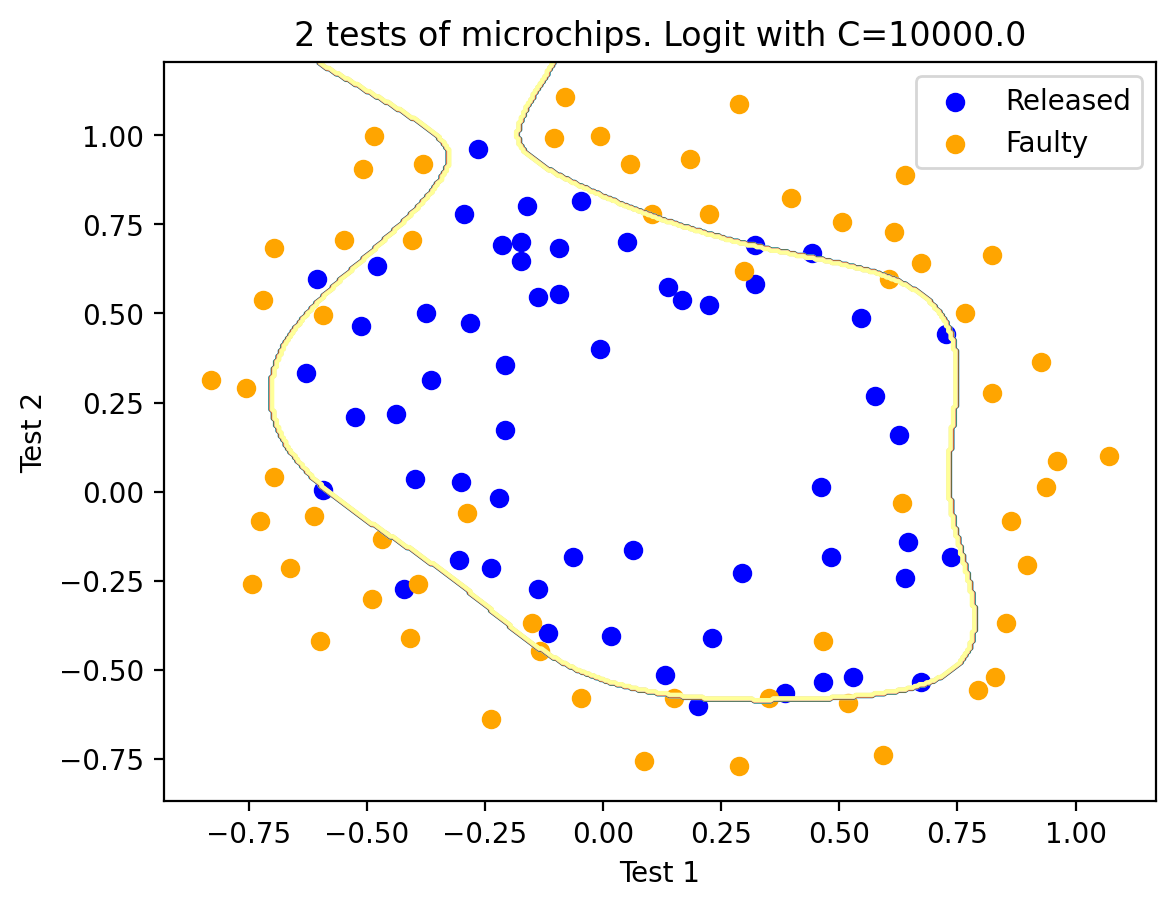

In [25]:
C = 1e4
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=0.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Released")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="orange", label="Faulty")
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("2 tests of microchips. Logit with C=%s" % C)
plt.legend()

print("Accuracy on training set:", round(logit.score(X_poly, y), 3))

Чтобы обсудить результаты, запишем функцию, которая оптимизирована в логистической регресии:
$\large J(X,y,w) = \mathcal{L} + \frac{1}{C}||w||^2,$

**Промежуточные выводы:**
- чем больше параметр $C$, тем более сложные зависимости в данных может восстанавливать модель (интуитивно $C$ соответствует "сложности" модели (model capacity))
- если регуляризация слишком сильная (малые значения $C$), то решением задачи минимизации логистической функции потерь может оказаться то, когда многие веса занулились или стали слишком малыми. Модель недостаточно штрафуется за ошибки, и оказыватеся недоученной. (1 случай)
- если регуляризация слишком слабая (большие значения $C$), то решением задачи оптимизации может стать вектор $w$ с большими по модулю компонентами. В таком случае больший вклад в оптимизируемый функционал $J$ имеет $\mathcal{L}$ и, вольно выражаясь, модель слишком "боится" ошибиться на объектах обучающей выборки, поэтому окажется переобученной (3 случай)
- Значение $C$ логистическая регрессия сама определить не может, так же как дерево решений не выбирает max_depth. $C$ — это гиперпараметр, который настраивается через кросс-валидацию.

#### Тюнинг параметров
Найдем оптимальное в данном примере значение параметра регулизации С. Будем иссподьзовать `LogisticRegressionCV` - перебор параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регресии (для нее известны эффективные алгоритмы перебора параметров), для произвольной можели мы бы использовть `GridSearchCV`, `RandomizedSearchCV`.

In [34]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, n_jobs=-1)
logit_searcher.fit(X_poly, y)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.02334021e-02, 1.04722519e-02, 1.07166765e-02,
       1.09668060e-02, 1.12227736e-02, 1.14847155e-02, 1.17527712e-02,
       1.20270833e-02, 1.23077980e-02, 1.25950646e-02, 1.28890361e-02,
       1.31898690e-02, 1.34977233e-02, 1.38127630e-02, 1.41351558e-02,
       1.44650734e-02, 1.48026913e-02, 1.51481892e-02, 1.55017512e-02,
       1.58635653e-02, 1.62...
       6.45088409e+02, 6.60144909e+02, 6.75552832e+02, 6.91320378e+02,
       7.07455942e+02, 7.23968114e+02, 7.40865683e+02, 7.58157646e+02,
       7.75853206e+02, 7.93961785e+02, 8.12493021e+02, 8.31456781e+02,
       8.50863158e+02, 8.70722485e+02, 8.91045332e+02, 9.11842520e+02,
       9.33125118e+02, 9.54904456e+02, 9.77192128e+02, 1.00000000e+03]),
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     n_jobs=-1)

In [37]:
logit_searcher.C_ 

array([165.36244071])

Построим график зависимости качества модели, от гиперпараметра $С$.

Text(0, 0.5, 'Mean CV-accuracy')

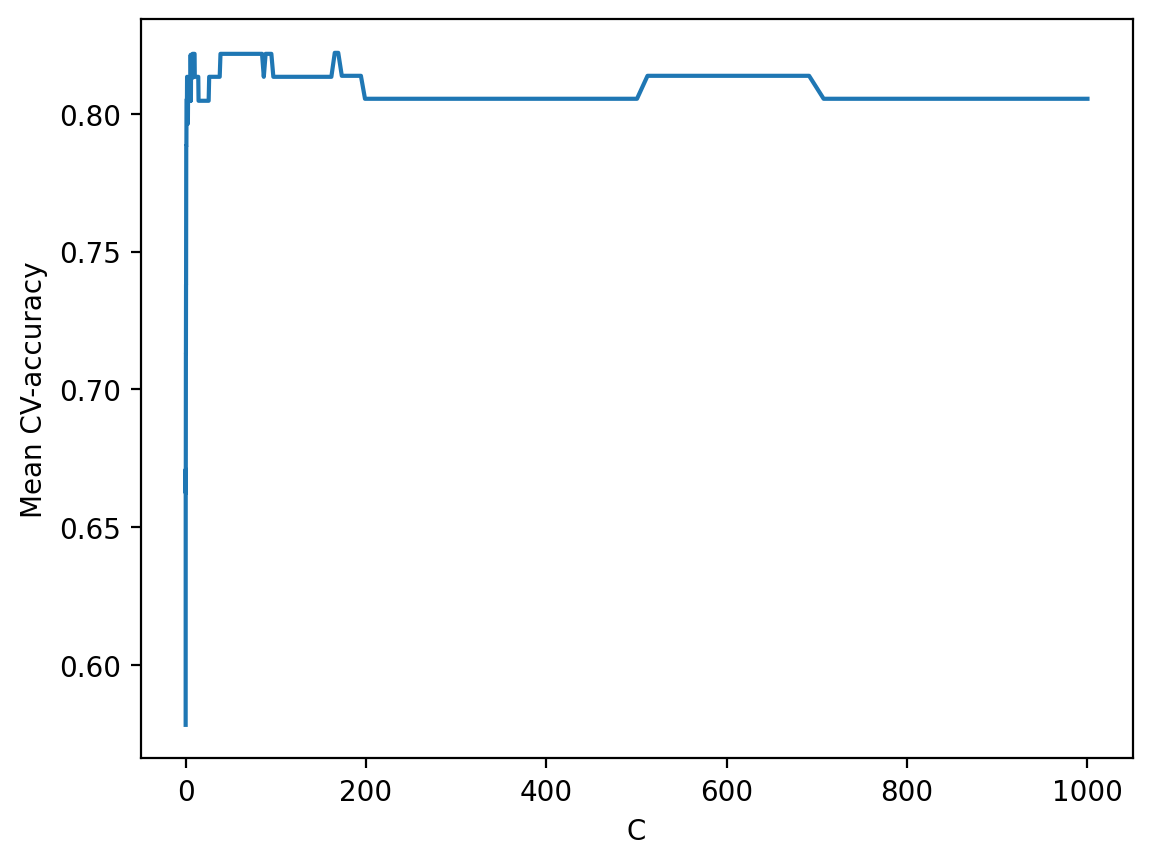

In [41]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel("C")
plt.ylabel("Mean CV-accuracy")

Эти кривые называются **кривыми обучения**.